In [1]:
#  library from: https://github.com/pasuder/hokuyo-python-lib
import hokuyo

In [52]:
import serial

from hokuyo.driver import hokuyo
from hokuyo.tools import serial_port

uart_port = '/dev/ttyACM0'
uart_speed = 19200

__author__ = 'paoolo'
laser_serial = serial.Serial(port=uart_port, baudrate=uart_speed, timeout=0.5)
port = serial_port.SerialPort(laser_serial)

laser = hokuyo.Hokuyo(port)


In [36]:
laser.laser_on()
print(laser.set_high_sensitive())


HS1
00P




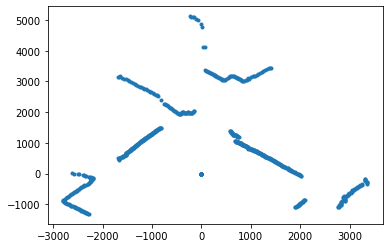

In [38]:
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

s = laser.get_single_scan()
s = sorted(s.items())
dtheta, distance = list(numpy.array(s).transpose())
theta = numpy.radians(dtheta)
plt.scatter(numpy.sin(theta)*distance, numpy.cos(theta)*distance, marker=".")
plt

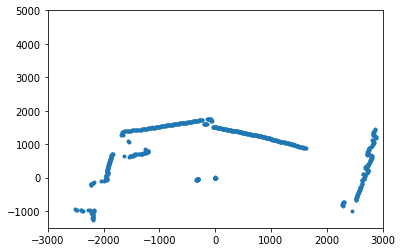

In [51]:


import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

metadata = dict(title='hokuyo scanner', artist='Matplotlib', comment='Movie support!')
writer = FFMpegWriter(fps=10, metadata=metadata)

fig = plt.figure()
l, = plt.plot([], [], '.')

plt.xlim(-3000, 3000)
plt.ylim(-1500, 5000)

with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(50):
        s = laser.get_single_scan()
        s = sorted(s.items())
        dtheta, distance = list(numpy.array(s).transpose())
        theta = numpy.radians(dtheta)
        l.set_data(numpy.sin(theta)*distance, numpy.cos(theta)*distance)
        writer.grab_frame()
